# Stroop Effect Test Investigation

This jupyter notebook is my submission for the P1 section of the Data Analyst Nanodegree project 'Statistics: The Science of Decisions'. Each section of this notebook corresponds to a question from the [project Instructions page](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True).

### Question 1:
** *What is our independent variable? What is our dependent variable?* **

The independent variable is the word set a participant is given (congruent or incongruent) and the dependent variable is the time it takes a participant in the experiment to name the ink colors in the two equally-sized lists.

### Question 2:
** *What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.* **

An appropriate set of hypotheses that may allow us to make inferences about the population of possible Stroop Effect test takers are:
* Null Hypothesis ($H_0$): The population mean, $\mu$, is equal to the mean of the mean of the congruent condition from the Stroop Effect test, denoted $\mu_c$.
* Alternative Hypothesis ($H_1$): The population mean, $\mu$, is greater than the mean of the congruent condition, $\mu_c$.

$$H_0: \mu = \mu_c \text{ vs. } H_1: \mu > \mu_c$$

### Question 3:
** *Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.* **

The following two sub-sections of this notebook contain a data set along with descriptive statistics for each. The first is the 'Udacity data set', which contains twenty four participants' recorded times for both the congruent and incongruent tasks. The second is the 'University of Washington data set' which is a set of grouped data that I captured manually from the last page in the sequence of pages on the UW (University of Washington) Stroop Effect test website. More details on the two data sets and descriptive statistics are provided below.

##### Udacity data set

Within Udacity's project description a [link was provided to a small set of twenty four recorded times](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view) for the Stroop Effect test. For each row, the time to complete the Congruent task was provided along side the time to complete the Incongruent task. The below table displays all 24 participants recorded times for both conditions.

In [2]:
# load and display the data
import pandas as pd

stroop = pd.read_csv('supporting-files/stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The sample size for this data set is 24: $$n=24$$

The sample mean for the incongruent task is calculated by summing all $x_i$ values and dividing by $n$: $$\bar x = \frac{\sum\limits_{i=1}^{n} x_i}{n}$$

In [3]:
# compute the sample mean of the incongruent task
incong_mean = stroop['Incongruent'].mean()
print('Incongruent task mean: %s' % incong_mean)

Incongruent task mean: 22.01591666666667


The sample mean of the incongruent task is: $$\bar x_1 \approx 22.0159$$

A measure of dispersion about the mean is also necessary for the hypothesis test. For this, the unbiased estimator for standard deviation will be used because our sample size is less than thirty. The unbiased estimator for standard deviation is calculated by taking the square root of the variance, which is the sum of the squared deviations from the mean divided by n minus 1: 

$$\hat{s} = \sqrt{\hat{s}} = \sqrt{\frac{1}{n-1}*\sum\limits_{i=1}^{n}(x_i - \bar x)^2}$$

In [4]:
# compute the unbiased estimator for standard deviation
import statistics as stats
incong_ustdv = stats.stdev(stroop['Incongruent'])
cong_ustdv = stats.stdev(stroop['Congruent'])
print('Incongruent task unbiased estimator for standard deviation: %s' % incong_ustdv)
print('Congruent task unbiased estimator for standard deviation: %s' % cong_ustdv)

Incongruent task unbiased estimator for standard deviation: 4.7970571224691385
Congruent task unbiased estimator for standard deviation: 3.5593579576451955


The unbiased estimator for standard deviation of the incongruent task is: $$\hat{s} \approx 4.7971$$

It may also be important later to consider the mean for the congruent task (calculated using the same method for $\bar x_1$.

In [5]:
# compute the sample mean of the congruent task
cong_mean = stroop['Congruent'].mean()
print('Congruent task mean: %s' % cong_mean)

Congruent task mean: 14.051125000000004


The sample mean of the congruent task is:
$$\bar x_2 \approx 14.0511$$

##### University of Washington data set

Aside from the data set of 24 participants provided in the project instructions, another set can be uncovered in [the University of Washington's online Stroop test](https://faculty.washington.edu/chudler/java/ready.html). After taking the test, a page is displayed where one can enter one's results from both the Congruent and Incongruent tasks. After doing so a grouped breakdown of all participants' performance up until that point is revealed. When I completed the test I was the 204,083rd person to record a time. I captured the values manually and added them to the below dataframe. The intervals in this grouped data represent the **increase** in time taken to complete the test between the Congruent and Incongruent tasks. Here 'Total' represents the total number of people to have recorded their times (aka, the frequency of each measurement where a measurement is the 'Midpoint').

In [6]:
interval = ['0-5 sec','5-10 sec','10-15 sec','15-20 sec','20-25 sec','25-30 sec','30-35 sec','35-40 sec','More than 40 sec']
grouped_values = [40098,52420,48947,23050,11958,4927,3047,1930,3897]
midpoint = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]

uw_grouped_data = pd.DataFrame({'Interval':interval,
                               'Midpoint':midpoint,
                               'Total':grouped_values})
uw_grouped_data

,Interval,Midpoint,Total
0,0-5 sec,2.5,40098
1,5-10 sec,7.5,52420
2,10-15 sec,12.5,48947
3,15-20 sec,17.5,23050
4,20-25 sec,22.5,11958
5,25-30 sec,27.5,4927
6,30-35 sec,32.5,3047
7,35-40 sec,37.5,1930
8,More than 40 sec,42.5,3897


Two important notes about the University of Washington data:

I suspect that this grouped data contains inaccuracies. First, a small percentage of people (approximately 7%) claimed that the Incongruent word set took them **less** time to complete than the Congruent set. For the purposes of grouping the data in a similar fashion to the Udacity set I've disregarded such instances. While it may be true that, for a small proportion of the sample, the time to complete the incongruent task was less than the congruent task, I suspect some people are misreporting. The  data from the UW website is compiled from manual user-input (people selecting a radio button to note their times and submitting the result - this instead of the website somehow calculating this for them). People may be just clicking through, or selecting one of the first times they can in order to get to the summary page to see the full summary of all participants' times. 

Second, slightly less than 2% of participants took more than 40 seconds longer to complete the Incongruent set compared to the Congruent. It seems reasonable to group them in a category 'lasting more than 40 sec' given the true nature of the tail of this part of the distribution is unknown.

Overall it seems capturing the grouped data, while interesting, may not be sufficiently accurate to justify using it for a statistical investigation. As an exercise into working with already-grouped data, I'll report some descriptive statistics below:

In [7]:
# compute the sample size
uw_n = uw_grouped_data['Total'].sum()
print('UW sample size: %s' % uw_n)

UW sample size: 190274


The sample size for this data set is is 190274: $$n=190274$$

The sample mean for the grouped data is calculated by summing all $x_j$ (distinct measurements) multiplied by their frequency $t(x_j)$ and dividing by n:

$$\bar x = \frac{\sum\limits_{j=1}^{m} (x_j * t(x_j))}{n}$$

In [8]:
# prepare UW grouped data frame for computing mean
for row in uw_grouped_data:
    uw_grouped_data['xj*t(xj)'] = uw_grouped_data['Midpoint'] * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,xj*t(xj)
0,0-5 sec,2.5,40098,100245.0
1,5-10 sec,7.5,52420,393150.0
2,10-15 sec,12.5,48947,611837.5
3,15-20 sec,17.5,23050,403375.0
4,20-25 sec,22.5,11958,269055.0
5,25-30 sec,27.5,4927,135492.5
6,30-35 sec,32.5,3047,99027.5
7,35-40 sec,37.5,1930,72375.0
8,More than 40 sec,42.5,3897,165622.5


In [9]:
# compute the mean
uw_mean = uw_grouped_data['xj*t(xj)'].sum() / uw_grouped_data['Total'].sum()
print("UW sample mean is: %s" % uw_mean)

UW sample mean is: 11.82599829719247


The sample mean time as an increase from congruent to incongruent tasks for the grouped UW set is: $$\bar x \approx 11.8260$$

In computing the standard deviation for this grouped data, our sample size is sufficiently large enough that the unbiased estimator for standard deviation is not needed. The standard deviation is calculated by taking the square root of variance, which is the sum of the squared deviation of the measurements ('Midpoints') from the mean, multiplied by their respective frequency and divided by n: 

$$s_x = \sqrt{s_x^2} = \sqrt{\frac{1}{n}*(\sum\limits_{j=1}^{m}(x_j - \bar x)^2} * t(x_j))$$

In [10]:
# prepare UW grouped data for computing the standard deviation
for row in uw_grouped_data:
    uw_grouped_data['dev_calc'] = (uw_grouped_data['Midpoint'] - uw_mean)**2 * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,xj*t(xj),dev_calc
0,0-5 sec,2.5,40098,100245.0,3.487493e+06
1,5-10 sec,7.5,52420,393150.0,9.810016e+05
2,10-15 sec,12.5,48947,611837.5,2.223556e+04
3,15-20 sec,17.5,23050,403375.0,7.420785e+05
4,20-25 sec,22.5,11958,269055.0,1.362427e+06
5,25-30 sec,27.5,4927,135492.5,1.210437e+06
6,30-35 sec,32.5,3047,99027.5,1.302332e+06
7,35-40 sec,37.5,1930,72375.0,1.272168e+06
8,More than 40 sec,42.5,3897,165622.5,3.666665e+06


In [11]:
# compute standard deviation for the UW set
import math as math

uw_stdv = math.sqrt(uw_grouped_data['dev_calc'].sum() / uw_grouped_data['Total'].sum())
print("UW grouped data standard deviation: %s" % uw_stdv)

UW grouped data standard deviation: 8.592104638868703


The standard deviation for the UW grouped data set is: $$s_x \approx 8.5921$$

### Question 4:
** *Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.* **

For learning and exploration purposes I will visualize both the Udacity and UW data sets, though I intend only on using the Udacity set for my systistical analysis.

##### Udacity data set visualization

Each task, congruent and incongruent, can be grouped in five second bins and plotted in histogram form.

!!! Use a boxplot and Normal Q-Q plot

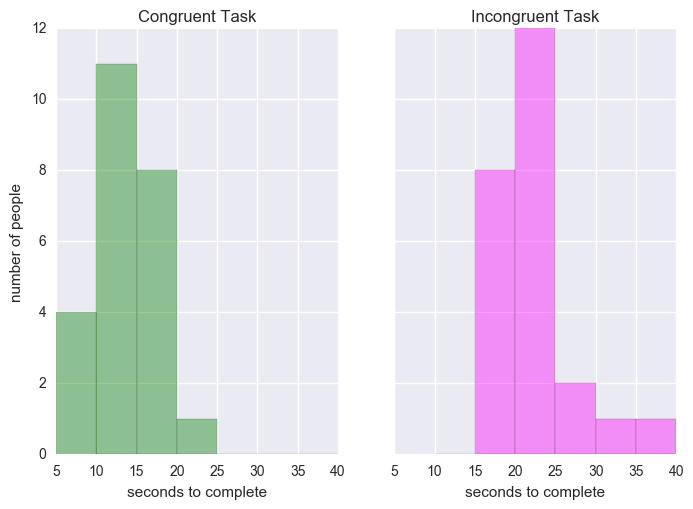

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cong = stroop['Congruent']
incong = stroop['Incongruent']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax1, kde=False)
ax1.set_title("Congruent Task")
ax1.set_ylabel("number of people")
ax1.set_xlabel("seconds to complete")

sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax2, kde=False)
ax2.set_title("Incongruent Task")
ax2.set_xlabel("seconds to complete")

plt.show()

Clearly the Incongruent task is taking longer to complete for most participants. This supports the statistical test I expect to conduct to see whether or not the mean time to complete the incongruent task is significantly more than that of the Congruent task. Based on the appearance of these distributions I believe it is acceptable to use the parameters I calculated in Question 3 when conduting a hypothesis test. 

##### University of Washington data set visualization

Although the sample sizes are vastly different, I think it would be interesting to plot the UW data set against the Udacity data set. The below dataframe calculates the difference in time between the congruent and incongruent tasks for the Udacity data set (first five rows are displayed).

In [13]:
for row in stroop:
    stroop['Difference'] = abs(stroop['Congruent'] - stroop['Incongruent'])
stroop.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


The below histograms constrain both data sets to bin sizes at five-second intervals. 

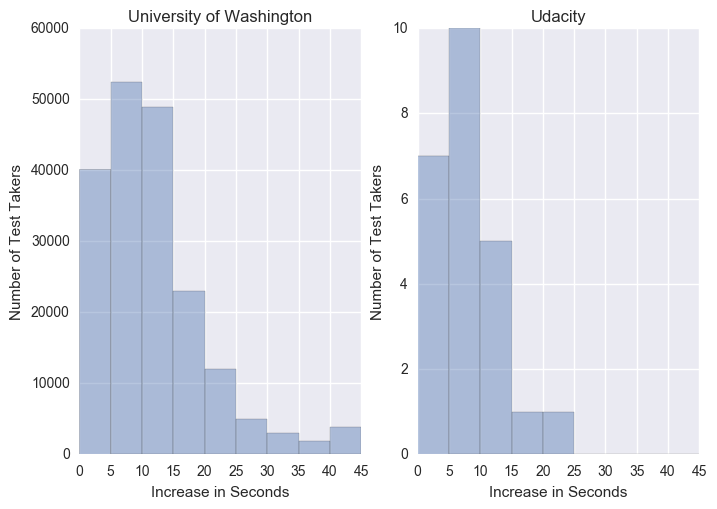

In [14]:
# plot the grouped differences in time for both the University of Washington data and the Udacity data
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey = False)

sns.distplot(midpoint, hist_kws={'weights':uw_grouped_data['Total']}, bins=range(0,50,5), ax=ax1, kde=False)
ax1.set_xlabel("Increase in Seconds")
ax1.set_ylabel("Number of Test Takers")
ax1.set_title("University of Washington")

sns.distplot(stroop['Difference'], bins=range(0,50,5), ax=ax2, kde=False)
ax2.set_xlabel("Increase in Seconds")
ax2.set_ylabel("Number of Test Takers")
ax2.set_title("Udacity")

plt.show()

The two distributions look similar, though I suspect the mean of the UW set is higher given the positive skew of the distribution. Although this is interesting to visualize I don't believe it is appropriate to continue any analysis given the possible inaccuracies of the UW sample and the difference in sample size between the two sets.

### Question 4:
** *Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?* **

The statistical test I will perform will be a hypothesis test to determine whether or not the mean time to complete the Stroop Effect test for the incongruent task is significantly more than the congruent task. As calculated earlier, the relevant parameters are:

Incongruent task:
* $n = 24$
* $\bar x_1 \approx 22.0159$
* $\hat{s} \approx 4.7971$

Congruent task:
* $\bar x_2 \approx 14.0511$

##### *Setting Up and performing the Test Of Significance*

Let $X = $ time in seconds to complete a given condition in the Stroop Effect test.

Using a t-test for the investigation, we assume the population is normally distributed $X \sim N(\mu, \sigma)$ where both $\mu$ (the population mean) and $\sigma$ (the population standard deviation) are unknown/unknowable. Therefore our method of standardization will be:
$$\frac{\bar X - \mu}{\frac{\hat{s}}{\sqrt{n}}} \sim t_{n-1}$$

The symbol for the congruent task mean for the hypothesis test will be denoted as $\mu$ instead of $\bar{x_2}$. Therefore the test of significance states that the null hypothesis, $H_0$, is equal to $\mu$, and the alternative hypothesis, $H_1$, is that the mean is significantly greater than $\mu$.

$$H_0: \mu = 14.0511$$ $$vs.$$ $$H_1: \mu > 14.0511$$

Testing at the $\alpha = 0.05$ level, we have a 0.05 probability that we reject the null hypothesis given the null hypothesis is true:

$$0.05 = P(\text{reject } H_0 | H_0 \text{is true})$$

Now to extend the calculation using a t-distribution becuase $n = 24 < 30$, we have the following equivalent statements:

$$= P(|t| > t^* | H_0  \text{is true})$$

$$= P(\frac{\bar X - \mu}{\frac{\hat{s}}{\sqrt{n}}} > t^* | \mu = 14.0511)$$

$$= P(\bar{X} > \mu + t^* \frac{\hat{s}}{\sqrt{n}})$$

The critical region is therefore wherever $\bar{x}$ is greater than $\mu + t^* \frac{\hat{s}}{\sqrt{n}}$. Any sample means greater than the critical region's threshold will result in the null hypothesis being rejected. For our hypothesis test we have the following parameters of the sample: 

Incongruent task:
* $n = 24$
* $\bar x_1 \approx 22.0159$
* $\hat{s} \approx 4.7971$

Congruent task:
* $\bar x_2 \approx 14.0511$

Noting that the value for $t^*$ (in this case, corresponding to 23 degrees of freedom) is 1.714, and plugging all of the value in we have:

$$= P(\bar{x} > 14.0511 + 1.714 \frac{4.7971}{\sqrt{24}})$$

The calculation reveals the test:
$$\bar{x} > 15.7295 \text{ (approximately)}$$

Here, our sample mean from the incongruent set is greater than the critical value of 15.7295. So we reject the null hypothesis.
$$\bar{x} = 22.0159 > 15.7295$$

According to how this hypothesis test was set up, 95% of all random sample means should be below the critical value of 15.7295. These results match up with my expectations given how high the mean time is for the Incongruent set.

### Question 6:
** *Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!* **

Intuitively I speculate that our brains are trained to recognize words and the pattern of unique words faster (with more priority) than that of colors. I can think of a similar task that would result in a similar effect, which may also provide some additional insights into how our brains behave.

I wonder if a test could be created to compare how fast our brains recognize words vs. objects. The [Rochester Institute of Technology](http://www.rit.edu/) has a page with some theoretical points on [the background of the Stroop Effect](https://www.rit.edu/cla/gssp400/sbackground.html). The most interesting to me is the 'Speed of Processing' model. Essentially, this model claims that word processing is much faster than color processing:

** *"The "Speed of Processing" hypothesis suggests that word processing is much faster than color processing. Thus, in a situation of incongruency between words and colors, when the task is to report the color, the word information arrives at the decision process stage earlier than the color information and results in processing confusion. On the other hand, when the task is to report the word, because the color information lags behind the word information, a decision can be made before the conflicting color information arrives."* **

I speculate that the congruent and incongruent tasks could be tested with a sufficiently large random sample, and compared against a similar test that uses stereotypical objects instead of words. For example, a [rubber ducky](https://img.clipartfest.com/521e9028ec01ceb8ed11bfe48db68b66_rubber-ducky-rubber-ducky_800-800.png) is iconically yellow. A [firetruck](http://images.clipartpanda.com/fire-truck-clipart-niXyyp7iB.gif) is iconically red, etc. Two conditions could be created for the experiment - a congruent and incongruent set. In the Incongruent set the rubber ducky may be blue, and the firetruck may be yellow. The results from the Stroop Effect test using word sets could be compared to the Stroop Effect test using stereotypical objecst. The difference between the two results may point to how quickly our brains process words versus how quickly they process objects.